<a href="https://colab.research.google.com/github/kilkuwu/pytorch-deep-learning/blob/main/lessons/01/exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 01. Mẫu Bài Tập PyTorch Workflow

Sau đây là mẫu cho các bài tập PyTorch workflow.

Đây chỉ là code khởi đầu và nhiệm vụ của bạn là điền vào chỗ trống.

Do tính linh hoạt của PyTorch, có thể có nhiều hơn một cách để trả lời câu hỏi.

Đừng lo lắng về việc cố gắng trả lời *đúng*, chỉ cần thử viết code đáp ứng được câu hỏi.

In [ ]:
# Import necessary libraries


In [2]:
# Setup device-agnostic code


## 1. Tạo một bộ dữ liệu đường thẳng sử dụng công thức hồi quy tuyến tính (`weight * X + bias`).
  * Đặt `weight=0.3` và `bias=0.9`, tổng cộng phải có ít nhất 100 điểm dữ liệu. 
  * Chia dữ liệu thành 80% training, 20% testing.
  * Vẽ biểu đồ dữ liệu training và testing để có thể trực quan hóa.

Kết quả đầu ra của cell bên dưới sẽ trông giống như thế này:
```
Number of X samples: 100
Number of y samples: 100
First 10 X & y samples:
X: tensor([0.0000, 0.0100, 0.0200, 0.0300, 0.0400, 0.0500, 0.0600, 0.0700, 0.0800,
        0.0900])
y: tensor([0.9000, 0.9030, 0.9060, 0.9090, 0.9120, 0.9150, 0.9180, 0.9210, 0.9240,
        0.9270])
```

Tất nhiên các số trong `X` và `y` có thể khác nhau nhưng lý tưởng nhất là chúng được tạo ra sử dụng công thức hồi quy tuyến tính.

In [ ]:
# Create the data parameters


# Make X and y using linear regression feature

print(f"Number of X samples: {len(X)}")
print(f"Number of y samples: {len(y)}")
print(f"First 10 X & y samples:\nX: {X[:10]}\ny: {y[:10]}")

In [ ]:
# Split the data into training and testing


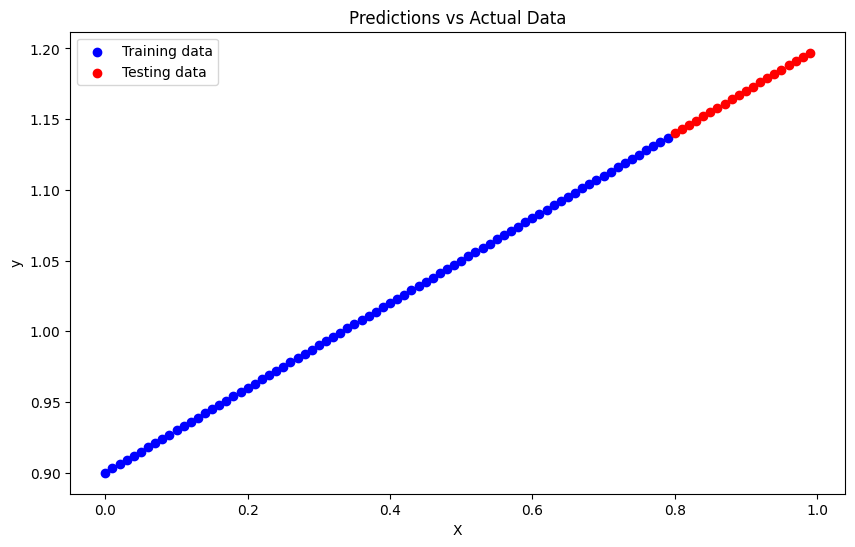

In [7]:
# Plot the training and testing data 
def plot_predictions(X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test, y_preds=None):
    import matplotlib.pyplot as plt
    
    plt.figure(figsize=(10, 6))
    plt.scatter(X_train.cpu(), y_train.cpu(), color='blue', label='Training data')
    plt.scatter(X_test.cpu(), y_test.cpu(), color='red', label='Testing data')
    if (y_preds is not None):
        plt.scatter(X_test.cpu(), y_preds.cpu(), color='green', label='Predictions')
    plt.title('Predictions vs Actual Data')
    plt.xlabel('X')
    plt.ylabel('y')
    plt.legend()
    plt.show()

plot_predictions()

## 2. Xây dựng một mô hình PyTorch bằng cách kế thừa `nn.Module`.
  * Bên trong phải có hai `nn.Parameter()` được khởi tạo ngẫu nhiên với `requires_grad=True`, một cho `weights` và một cho `bias`.
  * Triển khai phương thức `forward()` để tính toán hàm hồi quy tuyến tính mà bạn đã sử dụng để tạo bộ dữ liệu ở bài 1.
  * Sau khi đã xây dựng mô hình, hãy tạo một instance của nó và kiểm tra `state_dict()` của nó.
  * **Lưu ý:** Nếu bạn muốn sử dụng `nn.Linear()` thay vì `nn.Parameter()` thì cũng được.

In [ ]:
# Create PyTorch linear regression model by subclassing nn.Module


In [ ]:
# Instantiate the model and put it to the target device, and check its state_dict()


## 3. Tạo hàm loss và optimizer sử dụng `nn.L1Loss()` và `torch.optim.SGD(params, lr)` tương ứng.
  * Đặt learning rate của optimizer là 0.01 và các tham số cần tối ưu hóa phải là các tham số của mô hình bạn đã tạo ở bài 2.
  * Viết một vòng lặp training để thực hiện các bước training phù hợp trong 300 epochs.
  * Vòng lặp training phải kiểm tra mô hình trên tập dữ liệu test mỗi 20 epochs.

In [3]:
# Create the loss function and optimizer


In [ ]:
# Training loop


# Train model for 300 epochs

# Send data to target device

for epoch in range(epochs):
  ### Training

  # Put model in train mode

  # 1. Forward pass

  # 2. Calculate loss

  # 3. Zero gradients

  # 4. Backpropagation

  # 5. Step the optimizer

  ### Perform testing every 20 epochs
  if epoch % 20 == 0:

    # Put model in evaluation mode and setup inference context 

      # 1. Forward pass
      
      # 2. Calculate test loss

      # Print out what's happening
      print(f"Epoch: {epoch} | Train loss: {loss:.3f} | Test loss: {test_loss:.3f}")

## 4. Thực hiện dự đoán với mô hình đã được huấn luyện trên dữ liệu test.
  * Trực quan hóa các dự đoán này so với dữ liệu training và testing gốc (**lưu ý:** bạn có thể cần đảm bảo rằng các dự đoán *không* ở trên GPU nếu bạn muốn sử dụng các thư viện không hỗ trợ CUDA như matplotlib để vẽ biểu đồ).

In [ ]:
# Make predictions with the model


In [ ]:
# Plot the predictions (these may need to be on a specific device)


## 5. Lưu `state_dict()` của mô hình đã huấn luyện vào file.
  * Tạo một instance mới của lớp mô hình bạn đã tạo ở bài 2 và load `state_dict()` bạn vừa lưu vào đó.
  * Thực hiện dự đoán trên dữ liệu test với mô hình đã load và xác nhận rằng chúng khớp với các dự đoán của mô hình gốc từ bài 4.

In [ ]:
from pathlib import Path

# 1. Create models directory 

# 2. Create model save path 

# 3. Save the model state dict


In [ ]:
# Create new instance of model and load saved state dict (make sure to put it on the target device)


In [ ]:
# Make predictions with loaded model and compare them to the previous
